# CNN

## Imports:

In [2]:
import os 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

## Preprocessing:

In [46]:
mnist = tf.keras.datasets.mnist
(xTrain, yTrain),(xTest,yTest) = mnist.load_data()

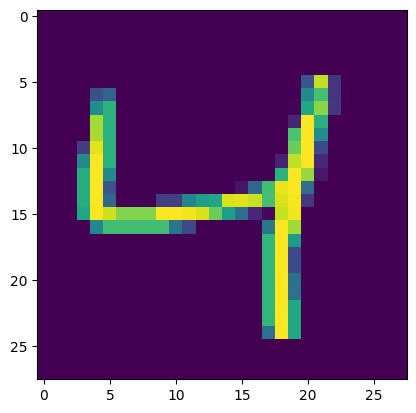

In [47]:
plt.imshow(xTrain[2])
plt.show()

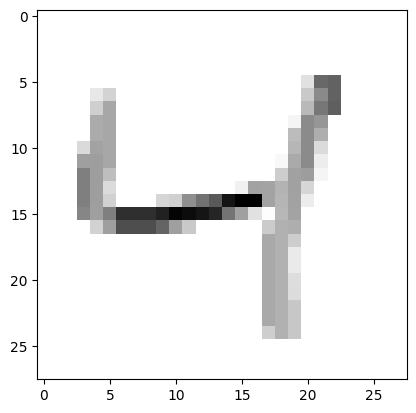

In [48]:
xTrain = tf.keras.utils.normalize(xTrain,axis=1)
xTest = tf.keras.utils.normalize(xTest,axis=1)
plt.imshow(xTrain[2],cmap=plt.cm.binary)

In [49]:
xTrainR = np.array(xTrain).reshape(-1,28,28,1)
xTestR = np.array(xTest).reshape(-1,28,28,1)
xTrain.shape, xTest.shape

((60000, 28, 28), (10000, 28, 28))

## Model: CNN[]

### imports

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Creating a model

In [68]:
model = Sequential()

#### First convolution layer

In [69]:
model.add(Conv2D(64,(3,3), input_shape = xTrainR.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Second convolution layer

In [70]:
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Third convolution layer

In [71]:
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully connected layer No 1.

In [72]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#### Fully connected layer No 2.

In [73]:
model.add(Dense(32))
model.add(Activation("relu"))

#### Last fully connected layer.

In [74]:
model.add(Dense(10))
model.add(Activation("softmax"))

### Model sumarry

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

### Compile Model

In [76]:
model.compile(loss="spares_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### Fitting the model.

In [80]:
model.fit(xTrainR,yTrain)

ValueError: in user code:

    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/losses.py", line 2367, in get
        return deserialize(identifier)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: spares_categorical_crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
